# Jupyter Data Science Workflow

## From exploratory analysis to reproducible science

###### <b><i>Mike L. Kiwa based on Jake VanderPlas work from University of Washington eScience Institute</i></b>

In [1]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
# username : password @ server  gis = GIS(proxy_host="username:password@www.myproxy.com", proxy_port=542)

In [2]:
import requests
# from requests.auth import HTTPProxyAuth
# proxies = {"http":"locahost:8080"}
# #auth = HTTPProxyAuth("ussername", "password")

#r = requests.get("https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD", proxies=proxies, auth=auth)

#from urllib.request import urlretrieve
#urlretrieve(URL,'Fremont.csv',reporthook=None)

In [3]:
# import requests
# import os

# # in my case I had to add my local domain
# proxies = {
#   'http': 'proxy.myagency.com:8080',
#   'https': 'user@localdomain:password@proxy.myagency.com:8080',
# }

# r=requests.get('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', proxies=proxies)
# print(r.text)

In [4]:
#!head Fremont.csv # linux command only

In [5]:
import pandas as pd 
data = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv', 
                   index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


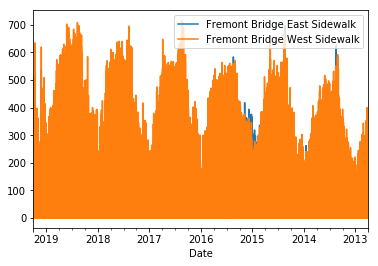

In [6]:
%matplotlib inline
data.plot();
# The plot looks very dense

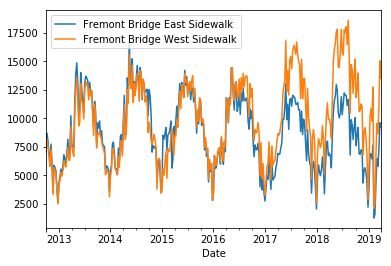

In [7]:
# Resample the data for a better plot
data.resample('w').sum().plot();

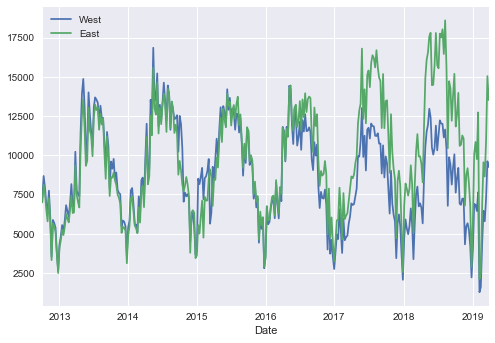

In [8]:
# change the style of the plot
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
data.columns = ['West','East']
data.resample('w').sum().plot();

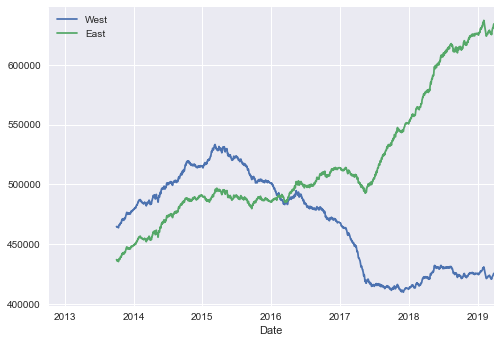

In [9]:
# See if there is annual trends in the data
# sum of rides in the previous 365 days
data.resample('D').sum().rolling(365).sum().plot();

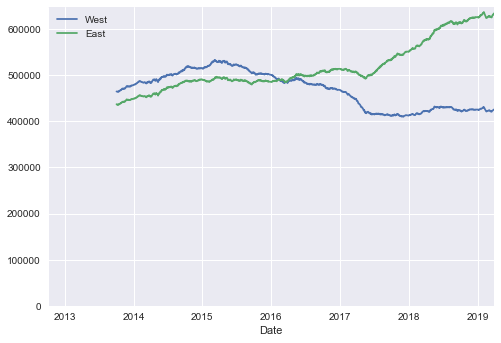

In [10]:
# Set the data limits for the y-axis
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

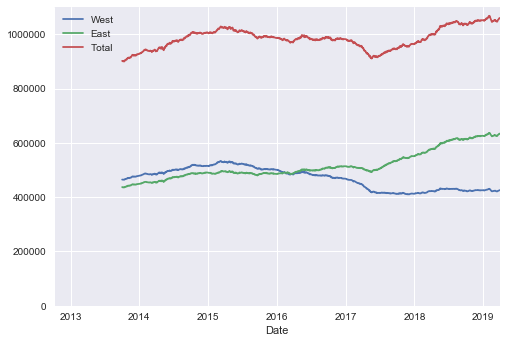

In [11]:
# Set the data limits for the y-axis
# Add a third column 'Total' and we see the total amount of rides hovers around 1 MIL a year
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

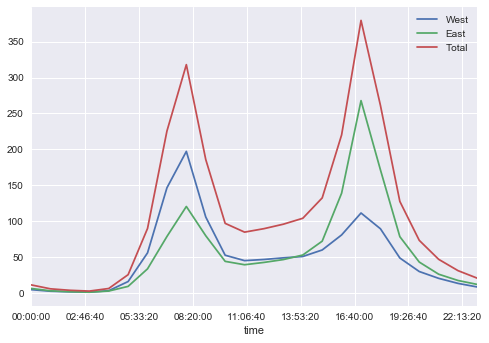

In [12]:
# Trends in individual days
data.groupby(data.index.time).mean().plot()

- East side ride peaks in the afternoon while the West side ride peaks in the morning.
- Total peaks are indicative of commute patterns in the morning and the afternoon.
    - People going into the city on the westbound side route in the morning and out of the city on the eastbound side route in the afternoon.

In [13]:
# A look at the whole dataset using pivot function in the form of pivot table
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


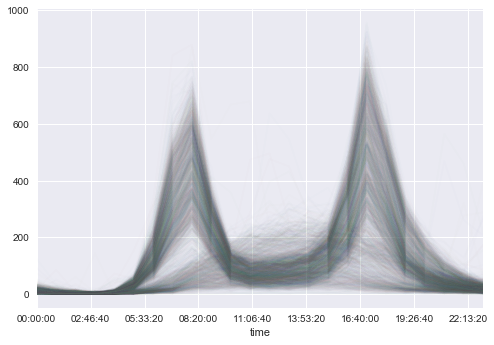

In [14]:
pivoted.plot(legend=False, alpha = 0.01);
# We observe a line for each day of the year with a transparency alpha of 0.01.
# We observe there are some day with similar commute patterns and other with commute patterns.
# A raw hypothesis would be more commute days to weekdays and less commute days to weekends and holidays.